# Importing

In [221]:
import pandas as pd
import sys
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 999)

In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
# Append the directory to your python path using sys
sys.path.append('/content/drive/MyDrive/BEFORE 2024/Project IDX')
# Import the modules
from utils.essential import *
from utils.preparation import *
from utils.preparation_visualization import *
from utils.preparation_preprocessing import *

In [ ]:
path_df_original = '/content/drive/MyDrive/BEFORE 2024/Project IDX/loan_data_2007_2014.csv' # - (Ensure path is correct)
#Original Dataframe definition
df_original = pd.read_csv(path_df_original, low_memory=False)

# Data Understanding


In [ ]:
# Inspection of the first entries of the dataset
df_original.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
total_entries = df_original.shape[0]
total_columns = df_original.shape[1]
# Count number of columns
print('The number of features in the original dataset is', total_columns)
# Count number of entres
print('The number of records in the original dataset is', total_entries)

The number of features in the original dataset is 75
The number of records in the original dataset is 466285


In [ ]:
duplicates = df_original.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


In [ ]:
missing_values = df_original.isnull().sum()
total_values = df_original.size
total_missing = missing_values.sum()
percentage_missing_of_total = round((total_missing / total_values) * 100)

print("Number of missing values:", total_missing)
print(f"Percentage of missing values relative to total values: {percentage_missing_of_total}%")

Number of missing values: 9776224
Percentage of missing values relative to total values: 28%


In [39]:
def select_null_constant_columns(df, null_threshold=1.0, constant_threshold=0.0):
    # Identify fully null columns
    null_columns = df.columns[df.isnull().all()]

    # Identify constant columns
    constant_columns = df.columns[df.nunique() == 1]

    # Apply thresholds for null and constant columns
    null_columns = [col for col in null_columns if df[col].isnull().mean() >= null_threshold]
    constant_columns = [col for col in constant_columns if df[col].nunique() == 1 and df[col].notnull().all()]

    return null_columns, constant_columns


In [38]:
table_title = ['Unnecessary columns']
column_titles = ['Fully null columns:', 'Constant columns:']
print_table(table_title, column_titles, null_cols, constant_cols)

| ['Unnecessary columns']   |                   |
|:--------------------------|:------------------|
| Fully null columns:       | Constant columns: |
|                           |                   |
| annual_inc_joint          | policy_code       |
| dti_joint                 | application_type  |
| verification_status_joint |                   |
| open_acc_6m               |                   |
| open_il_6m                |                   |
| open_il_12m               |                   |
| open_il_24m               |                   |
| mths_since_rcnt_il        |                   |
| total_bal_il              |                   |
| il_util                   |                   |
| open_rv_12m               |                   |
| open_rv_24m               |                   |
| max_bal_bc                |                   |
| all_util                  |                   |
| inq_fi                    |                   |
| total_cu_tl               |                   |


In [61]:
unusable_cols = null_cols + constant_cols
unusable_cols

['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'policy_code',
 'application_type']

We can check the rest of the columns as a sample of the most complete row, with the type and the value of its numerical variables and categorical features.

In [59]:
filtered_cols = exclude_elements(df_original.columns, unusable_cols)
df_filtered  = df_original[filtered_cols]
categorical_cols, numerical_cols = select_columns_by_type(df_filtered)
original_vt_valid_row = get_valid_row(df_filtered)
original_vt_cat = get_data_type_by_row(df_filtered, original_vt_valid_row, categorical_cols)
original_vt_num = get_data_type_by_row(df_filtered, original_vt_valid_row, numerical_cols)

In [60]:
table_title = ['Sample of the most complete row']
column_titles = ['Categorical', 'Numerical']
print_table(table_title, column_titles, original_vt_cat, original_vt_num )

| ['Sample of the most complete row']                                                                |                                             |
|:---------------------------------------------------------------------------------------------------|:--------------------------------------------|
| Categorical                                                                                        | Numerical                                   |
|                                                                                                    |                                             |
| term:  36 months (object)                                                                          | Unnamed: 0: 42630 (int64)                   |
| grade: B (object)                                                                                  | id: 10089537 (int64)                        |
| sub_grade: B3 (object)                                                                             | mem

Looking at the row sample value of each feature and and the feature type, there are mistyped features that will be correctly typed during preprocessing:

In [63]:
# should be data typed as a numerical feature (represent time lengths)
to_numerical = ["emp_length", "term"]
# should be data typed as a date, a numerical(time) feature.
to_temporal = ['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']

### Target Variable Inspection:
- The intended target of the model is the variable loan_status.

In [62]:
# Unique values of Target Variable
df_original['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

However this variable has 9 different categories. A new target will be created based on loan_satus by mapping the categories into a probability of default of 0 or 1, which will turn this into a binary classification problem.

# Data preparation

In [134]:
# Copy to prepare the data without modifying the original df
df_basic = df_original.copy()

#### Target Variable Transformation

In [135]:
(df_basic['loan_status'].value_counts() / len(df_basic)) * 100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [136]:
custom_mapping = {
    'Current': 0,
    'Fully Paid': 0,
    'In Grace Period': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Late (16-30 days)': 0,
    'Charged Off': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Charged Off': 1,
    'Late (31-120 days)': 1,
}

# Ensure the 'loan_status' column is of string type and strip any leading/trailing whitespace
df_basic['loan_status'] = df_basic['loan_status'].astype(str).str.strip()

# Use the custom mapping to create the 'default_likelihood' column
df_basic['default_likelihood'] = df_basic['loan_status'].map(custom_mapping)

# Check the unique values and data type of the 'default_likelihood' column
print(df_basic['default_likelihood'].value_counts())
print(df_basic['default_likelihood'].dtype)

0    415317
1     50968
Name: default_likelihood, dtype: int64
int64


#### Non-Informative / Unnecessary  Data Elimination

In [137]:
unused_target = "loan_status"
df_basic = df_basic.drop(columns=[unused_target])

In [138]:
# Remove fully null and constant columns (if any)
df_basic = df_basic.drop(columns=unusable_cols)

#### Data Formatting and Typing

In [139]:
def column_unique_values(df, column_name):
    unique_values = df[column_name].unique()
    return list(unique_values)

##### To numerical
import pandas as pd
import numpy as np
import re
def extract_value(value):
    match = re.search(r'(\d+)', value)
    if match:
        return match.group(1)
    else:
        return None
def get_replacement_value(value):
    if pd.isna(value):
        return np.nan
    else:
        return extract_value(value)
print("Columns to format:")
for col in to_numerical:
    col_values = column_unique_values(df_basic, col)
    print(f"{col}: {col_values}")
def map_value(value):
    if col == '< 1 year':
        return 0
    else:
        return get_replacement_value(value)
print("Formatted Columns")
for col in to_numerical:
    df_basic[col] = df_basic[col].apply(map_value)
    col_values = column_unique_values(df_basic, col)
    print(f"{col}: {col_values}")
for col in to_numerical:
    df_basic[col] = df_basic[col].astype('float64')
    data_type = get_data_type(df_basic, col)
    print(f"'{col}' correctly typed as: {data_type}")
df_basic['default_likelihood'] = df_basic['default_likelihood'].astype('int64')
import pandas as pd
from datetime import datetime


def format_and_convert_date(df, columns_to_convert, date_format='%b-%y'):
    for column in columns_to_convert:
        if df[column].dtype != 'datetime64[ns]':
            df[column] = df[column].str.strip()  # Remove leading and trailing whitespaces in values
            df[column] = pd.to_datetime(df[column], format=date_format, errors='coerce')
    return df
date_format = "%b-%y"
df_basic = format_and_convert_date(df_basic, to_temporal, date_format)

for col in to_temporal:
    data_type = get_data_type(df_basic, col)
    print(f"'{col}' correctly typed as: {data_type}")

Columns to format:
emp_length: ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years', '4 years', '5 years', '6 years', '2 years', '7 years', nan]
term: [' 36 months', ' 60 months']
Formatted Columns
emp_length: ['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan]
term: ['36', '60']
'emp_length' correctly typed as: float64
'term' correctly typed as: float64
'earliest_cr_line' correctly typed as: datetime64[ns]
'issue_d' correctly typed as: datetime64[ns]
'last_pymnt_d' correctly typed as: datetime64[ns]
'last_credit_pull_d' correctly typed as: datetime64[ns]
'next_pymnt_d' correctly typed as: datetime64[ns]


In [140]:
df_basic[to_temporal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   earliest_cr_line    466256 non-null  datetime64[ns]
 1   issue_d             466285 non-null  datetime64[ns]
 2   last_pymnt_d        465909 non-null  datetime64[ns]
 3   last_credit_pull_d  466243 non-null  datetime64[ns]
 4   next_pymnt_d        239071 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 17.8 MB


In [141]:
def select_datetime_columns(df):
    datetime_columns = df.select_dtypes(include=['datetime']).columns
    return datetime_columns

datetime_cols = select_datetime_columns(df_basic)

print("Datetime columns:", datetime_cols)

Datetime columns: Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')


# Data Understanding Part 2

## Unnecessary data check

In [148]:
categorical_cols, numerical_cols = select_columns_by_type(df_basic)
categorical = df_basic[categorical_cols]

In [87]:
# High Cardinality Check
total_rows = len(df_basic)
cardinality_threshold = 0.001  # You can adjust this threshold as needed
high_cardinality = []
for col in categorical.columns:
    unique_values = categorical[col].nunique()
    value_counts = categorical[col].value_counts()
    if len(value_counts) / total_rows > cardinality_threshold:
        high_cardinality.append(col)
        print(f"High Cardinality Detected in {col} | {unique_values} different categories")

High Cardinality Detected in emp_title | 205475 different categories
High Cardinality Detected in url | 466285 different categories
High Cardinality Detected in desc | 124436 different categories
High Cardinality Detected in title | 63099 different categories
High Cardinality Detected in zip_code | 888 different categories


In [91]:
def find_columns_with_dominant_class(df, threshold=0.8):
    dominant_columns = []

    for column in df.columns:
        value_counts = df[column].value_counts(normalize=True)
        top_class = value_counts.index[0]
        top_class_percentage = value_counts.iloc[0]

        if top_class_percentage >= threshold:
            dominant_columns.append((column, top_class, top_class_percentage))

    return dominant_columns


result = find_columns_with_dominant_class(categorical, threshold=0.85)
for column, top_class, top_class_percentage in result:
    print(f"Column '{column}' has a dominant class '{top_class}' with {top_class_percentage*100:.4f}% of the values.")


Column 'pymnt_plan' has a dominant class 'n' with 99.9981% of the values.


In [89]:
df_basic.pymnt_plan.value_counts()

n    466276
y         9
Name: pymnt_plan, dtype: int64

In [95]:
unnecessary_categorical = high_cardinality + ['pymnt_plan','sub_grade']

In [93]:
unnecessary_numerical = ['Unnamed: 0', 'member_id', 'id']

In [100]:
# Calculate the missing percentages and get the data lists
potential_missing_cat = exclude_elements(categorical_cols, unnecessary_categorical)
df_potential_missing_cat = df_basic[potential_missing_cat]
cat_low_col, cat_low_val, cat_high_col, cat_high_val = calculate_missing_percentages(df_potential_missing_cat, 50)
table_title = ["Rest of Categorical Columns by Missing Data %"]
column_titles = ["Low-Moderate % of Missing Values", '0-49%', '', "High % of Missing Values", "50% - 99%"]
print_table(table_title, column_titles, cat_low_col, cat_low_val, '', cat_high_col, cat_high_val)

| ['Rest of Categorical Columns by Missing Data %']   |       |    |                          |           |
|:----------------------------------------------------|:------|:---|:-------------------------|:----------|
| Low-Moderate % of Missing Values                    | 0-49% |    | High % of Missing Values | 50% - 99% |
|                                                     |       |    |                          |           |
| grade                                               | 0.0   |    |                          |           |
| home_ownership                                      | 0.0   |    |                          |           |
| verification_status                                 | 0.0   |    |                          |           |
| purpose                                             | 0.0   |    |                          |           |
| addr_state                                          | 0.0   |    |                          |           |
| initial_list_status       

In [105]:
potential_missing_num = exclude_elements(df_basic[numerical_cols], unnecessary_numerical)
df_potential_missing_num = df_basic[potential_missing_num]
num_low_col, num_low_val, num_high_col, num_high_val = calculate_missing_percentages(df_potential_missing_num, 50)
table_title = ["Numerical by  Columns Data %"]
column_titles = ["Low-Moderate % of Missing Values", '0-49%', '', "High % of Missing Values", "50% - 99%"]
print_table(table_title, column_titles, num_low_col, num_low_val, '', num_high_col, num_high_val)

| ['Numerical by  Columns Data %']   |       |    |                          |           |
|:-----------------------------------|:------|:---|:-------------------------|:----------|
| Low-Moderate % of Missing Values   | 0-49% |    | High % of Missing Values | 50% - 99% |
|                                    |       |    |                          |           |
| total_rev_hi_lim                   | 15.0  |    |                          |           |
| tot_cur_bal                        | 15.0  |    |                          |           |
| tot_coll_amt                       | 15.0  |    |                          |           |
| emp_length                         | 5.0   |    |                          |           |
| loan_amnt                          | 0.0   |    |                          |           |
| out_prncp_inv                      | 0.0   |    |                          |           |
| acc_now_delinq                     | 0.0   |    |                          |           |

In [101]:
unnecessary_numerical = join_column_lists(unnecessary_numerical, num_high_col)
print(unnecessary_numerical)

['Unnamed: 0', 'member_id', 'id', 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq']


In [109]:
df_potential_missing_temp = df_basic[to_temporal]
num_low_col, num_low_val, num_high_col, num_high_val = calculate_missing_percentages(df_potential_missing_temp, 50)
table_title = ["Datetime by  Columns Data %"]
column_titles = ["Low-Moderate % of Missing Values", '0-49%', '', "High % of Missing Values", "50% - 99%"]
print_table(table_title, column_titles, num_low_col, num_low_val, '', num_high_col, num_high_val)

| ['Datetime by  Columns Data %']   |       |    |                          |           |
|:----------------------------------|:------|:---|:-------------------------|:----------|
| Low-Moderate % of Missing Values  | 0-49% |    | High % of Missing Values | 50% - 99% |
|                                   |       |    |                          |           |
| next_pymnt_d                      | 49.0  |    |                          |           |
| earliest_cr_line                  | 0.0   |    |                          |           |
| issue_d                           | 0.0   |    |                          |           |
| last_pymnt_d                      | 0.0   |    |                          |           |
| last_credit_pull_d                | 0.0   |    |                          |           |


In [151]:
df_basic = df_basic.drop(columns=['next_pymnt_d','issue_d','last_pymnt_d'])

In [152]:
used_temp = ['earliest_cr_line', 'last_credit_pull_d']

In [153]:
# Extract month information
df_basic['earliest_cr_line_month'] = df_basic['earliest_cr_line'].dt.month
df_basic['last_credit_pull_d_month'] = df_basic['last_credit_pull_d'].dt.month


df_basic = df_basic.drop(columns=used_temp)


## Basic EDA

In [154]:
# Initialize a dictionary to store the count of unique values
unique_value_counts = {}

for col_name in categorical_cols:
    unique_count = df_basic[col_name].nunique()
    unique_value_counts[col_name] = unique_count
    print(f"Total unique values in column '{col_name}': {unique_count}")

Total unique values in column 'grade': 7
Total unique values in column 'sub_grade': 35
Total unique values in column 'emp_title': 205475
Total unique values in column 'home_ownership': 6
Total unique values in column 'verification_status': 3
Total unique values in column 'pymnt_plan': 2
Total unique values in column 'url': 466285
Total unique values in column 'desc': 124436
Total unique values in column 'purpose': 14
Total unique values in column 'title': 63099
Total unique values in column 'zip_code': 888
Total unique values in column 'addr_state': 50
Total unique values in column 'initial_list_status': 2


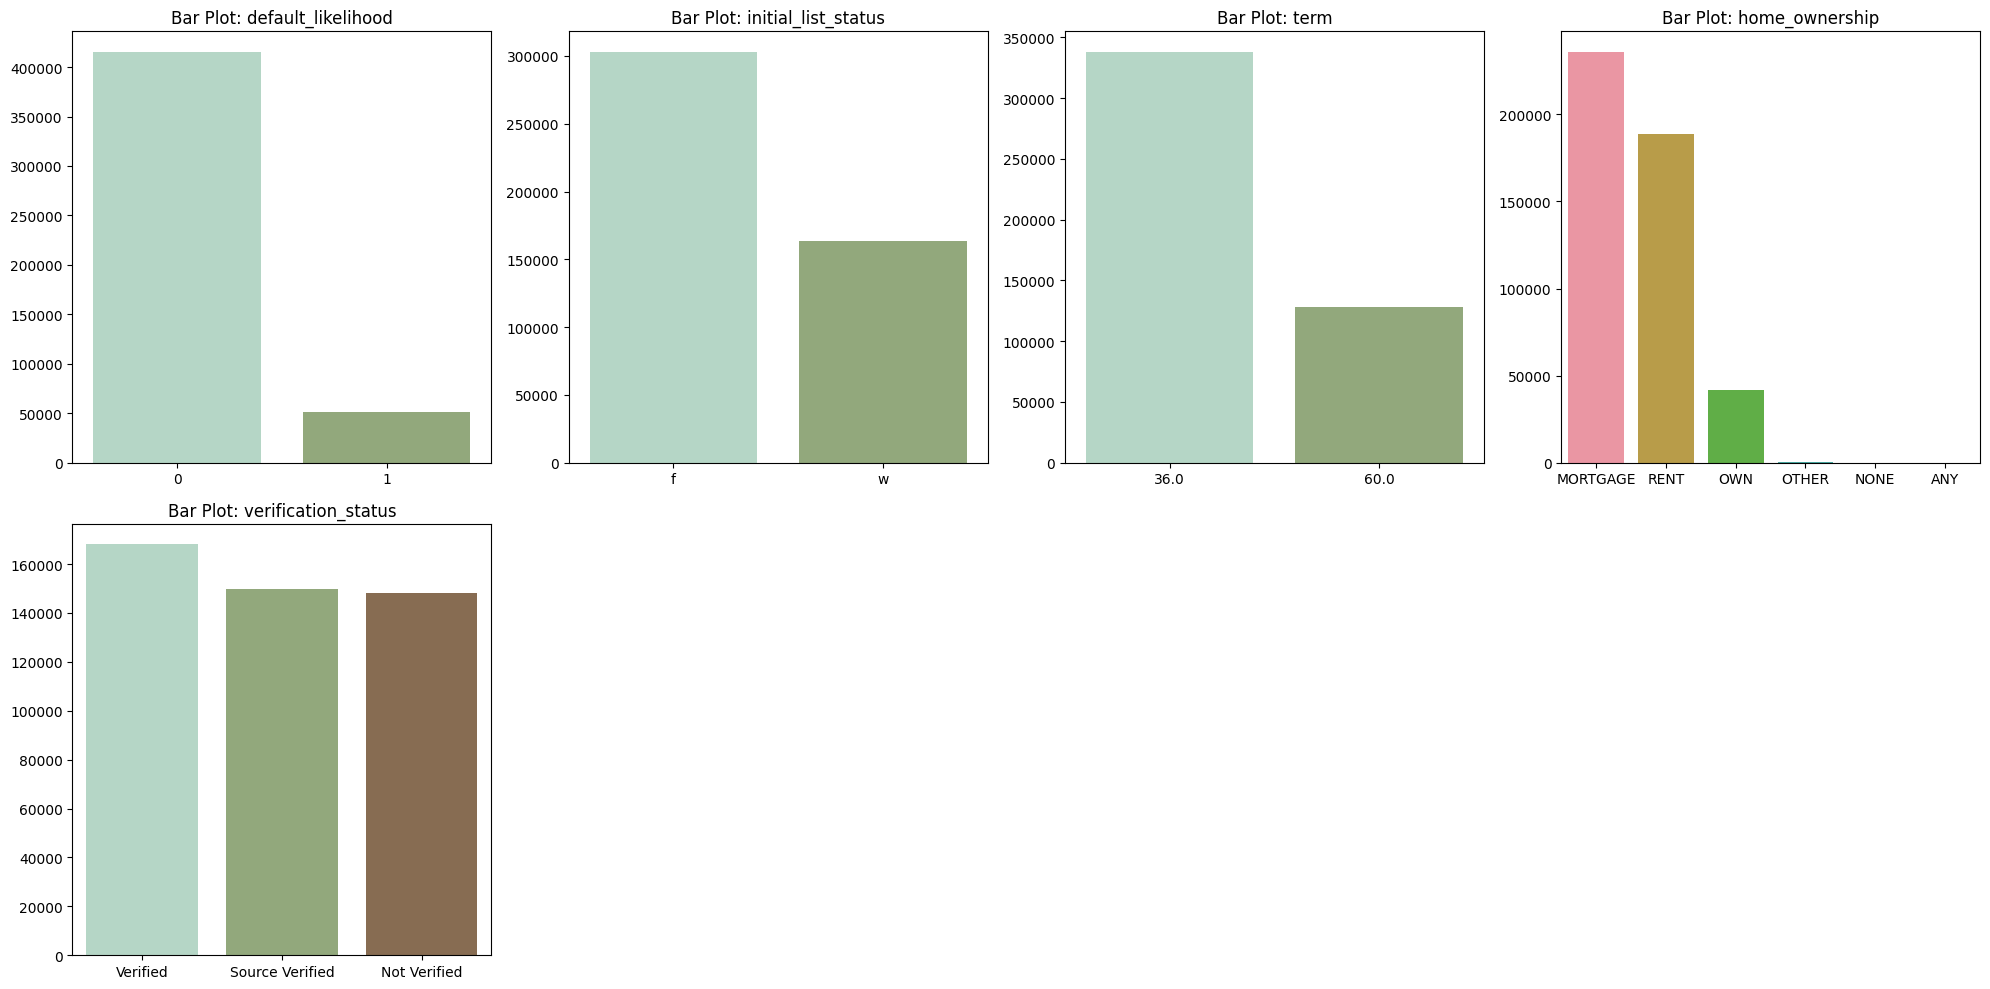

In [144]:
cols_to_plot = ['default_likelihood',
 'initial_list_status',
 'term',
 'home_ownership',
 'verification_status']
custom_functions_list = [
    custom_barplot, custom_barplot, custom_barplot, custom_barplot, custom_barplot
]

withingrid_col_per_function(df_basic, cols_to_plot, custom_functions_list=custom_functions_list, figsize=(20, 10))


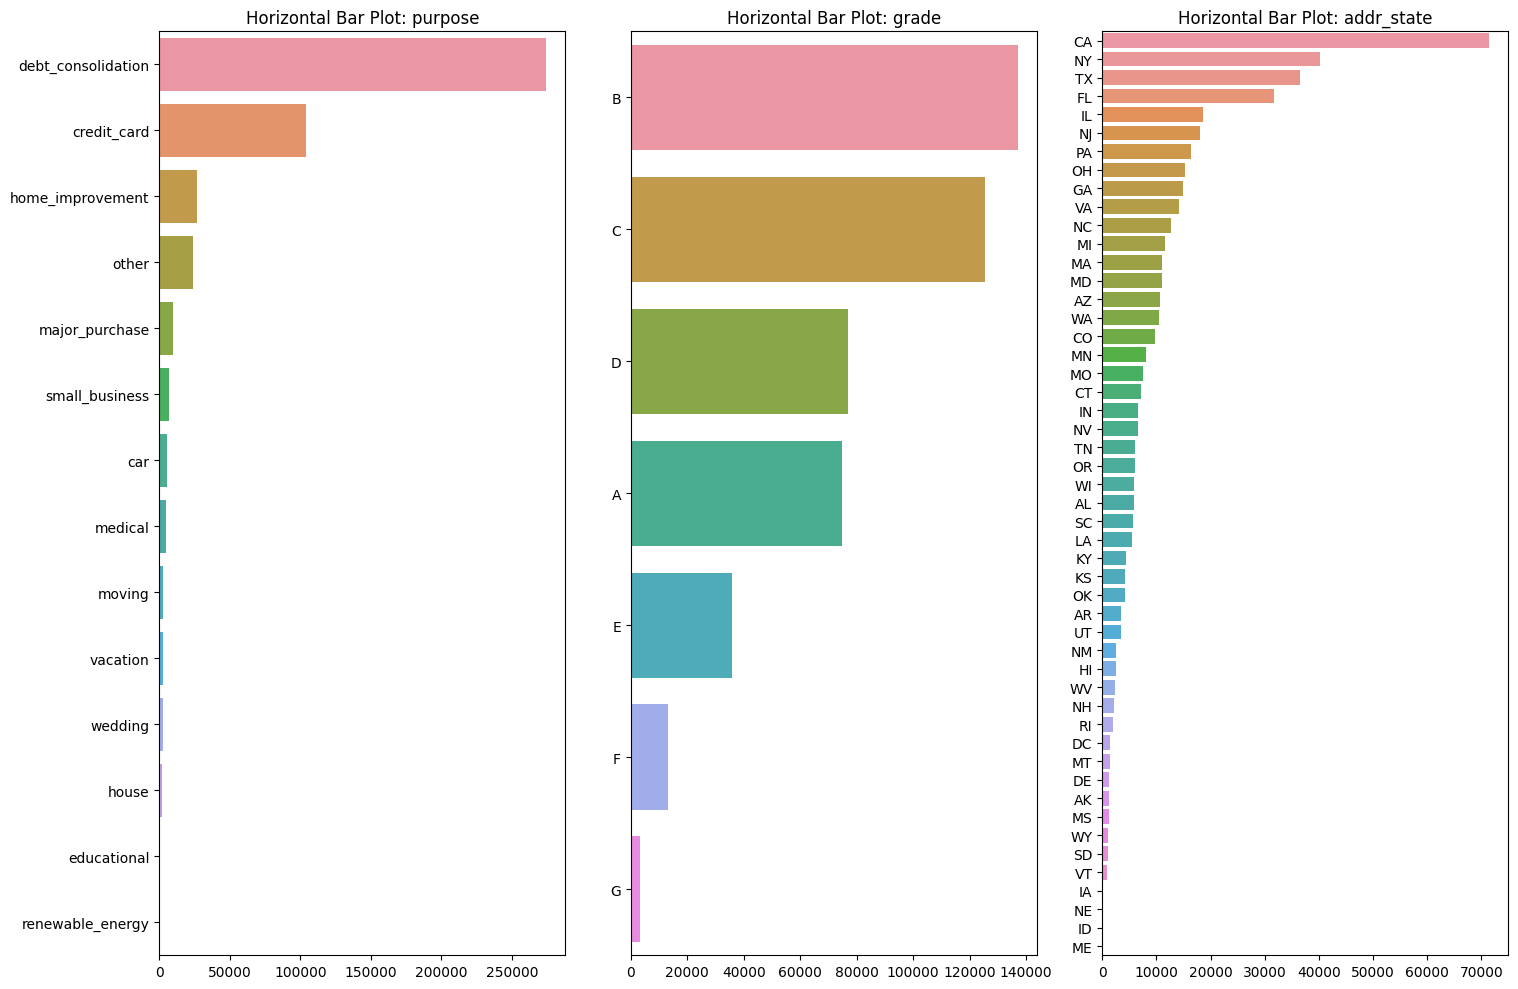

In [145]:
def custom_hor_barplot(df, column, ax, custom_palette=None):
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.values, y=value_counts.index, data=df, ax=ax, palette=custom_palette)
    ax.set_title(f'Horizontal Bar Plot: {column}')
cols_to_plot = ['purpose','grade', 'addr_state']
custom_function = custom_hor_barplot

withingrid_function_per_cols(df_basic, cols_to_plot, custom_function, figsize=(20, 10))

# Data Preparation Part 2
- There is no duplicated data so no treatment is necessary.
- Models robust to outliers will be used during modeling so there is no need to handle outlers

#### Non-Informative / Unnecessary  Data *Elimination*

In [155]:
df_basic = df_basic.drop(columns=unnecessary_categorical)
df_basic = df_basic.drop(columns=unnecessary_numerical)


#### Data split

In [195]:
# Feature / Label Split
X = df_basic.drop('default_likelihood', axis=1)
y = df_basic['default_likelihood']

# Split the balanced data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
check_feature_consistency(X_train, X_test)

Feature sets in training and test data are consistent.


In [196]:
# Performing Imputation
# With Data Split
X_train_Imp, X_test_Imp = impute_data(X_train, split_data=True, X_test=X_test, drop_all=False)  # Imputing rows with missing values
check_feature_consistency(X_train_Imp, X_test_Imp)
numerical_cols, categorical_cols = list_column_types(X_train_Imp)


Feature sets in training and test data are consistent.
Numerical Columns:
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'earliest_cr_line_month', 'last_credit_pull_d_month'],
      dtype='object')

Categorical Columns:
Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')


In [197]:
# Concatenate the training and testing data for one-hot encoding
X_concatenated = pd.concat([X_train_Imp, X_test_Imp])

# Separate numerical columns (excluding datetime columns)
X_categorical = X_concatenated.select_dtypes(exclude=['datetime64','number']).copy()

# Separate numerical columns (excluding datetime columns)
X_numerical = X_concatenated.select_dtypes(include=['datetime64','number']).copy()

# One-hot encode categorical data
X_categorical_encoded = one_hot_encode(X_categorical)

# Scale numerical data
X_numerical_scaled = scale_features(X_numerical, scaler_type='Robust')

# Concatenate the processed data
X_encoded_scaled = pd.concat([X_categorical_encoded, X_numerical_scaled], axis=1)

# Split the encoded data back into training and testing datasets
X_train_ready = X_encoded_scaled.iloc[:len(X_train_Imp)]
X_test_ready = X_encoded_scaled.iloc[len(X_train_Imp):]

In [198]:
check_feature_consistency(X_train_ready, X_test_ready)
numerical_cols, categorical_cols = list_column_types(X_train_ready)

Feature sets in training and test data are consistent.
Numerical Columns:
Index(['grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN',
       ...
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'earliest_cr_line_month',
       'last_credit_pull_d_month'],
      dtype='object', length=109)

Categorical Columns:
Index([], dtype='object')


In [199]:
# Apply Random Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_ready, y_train)



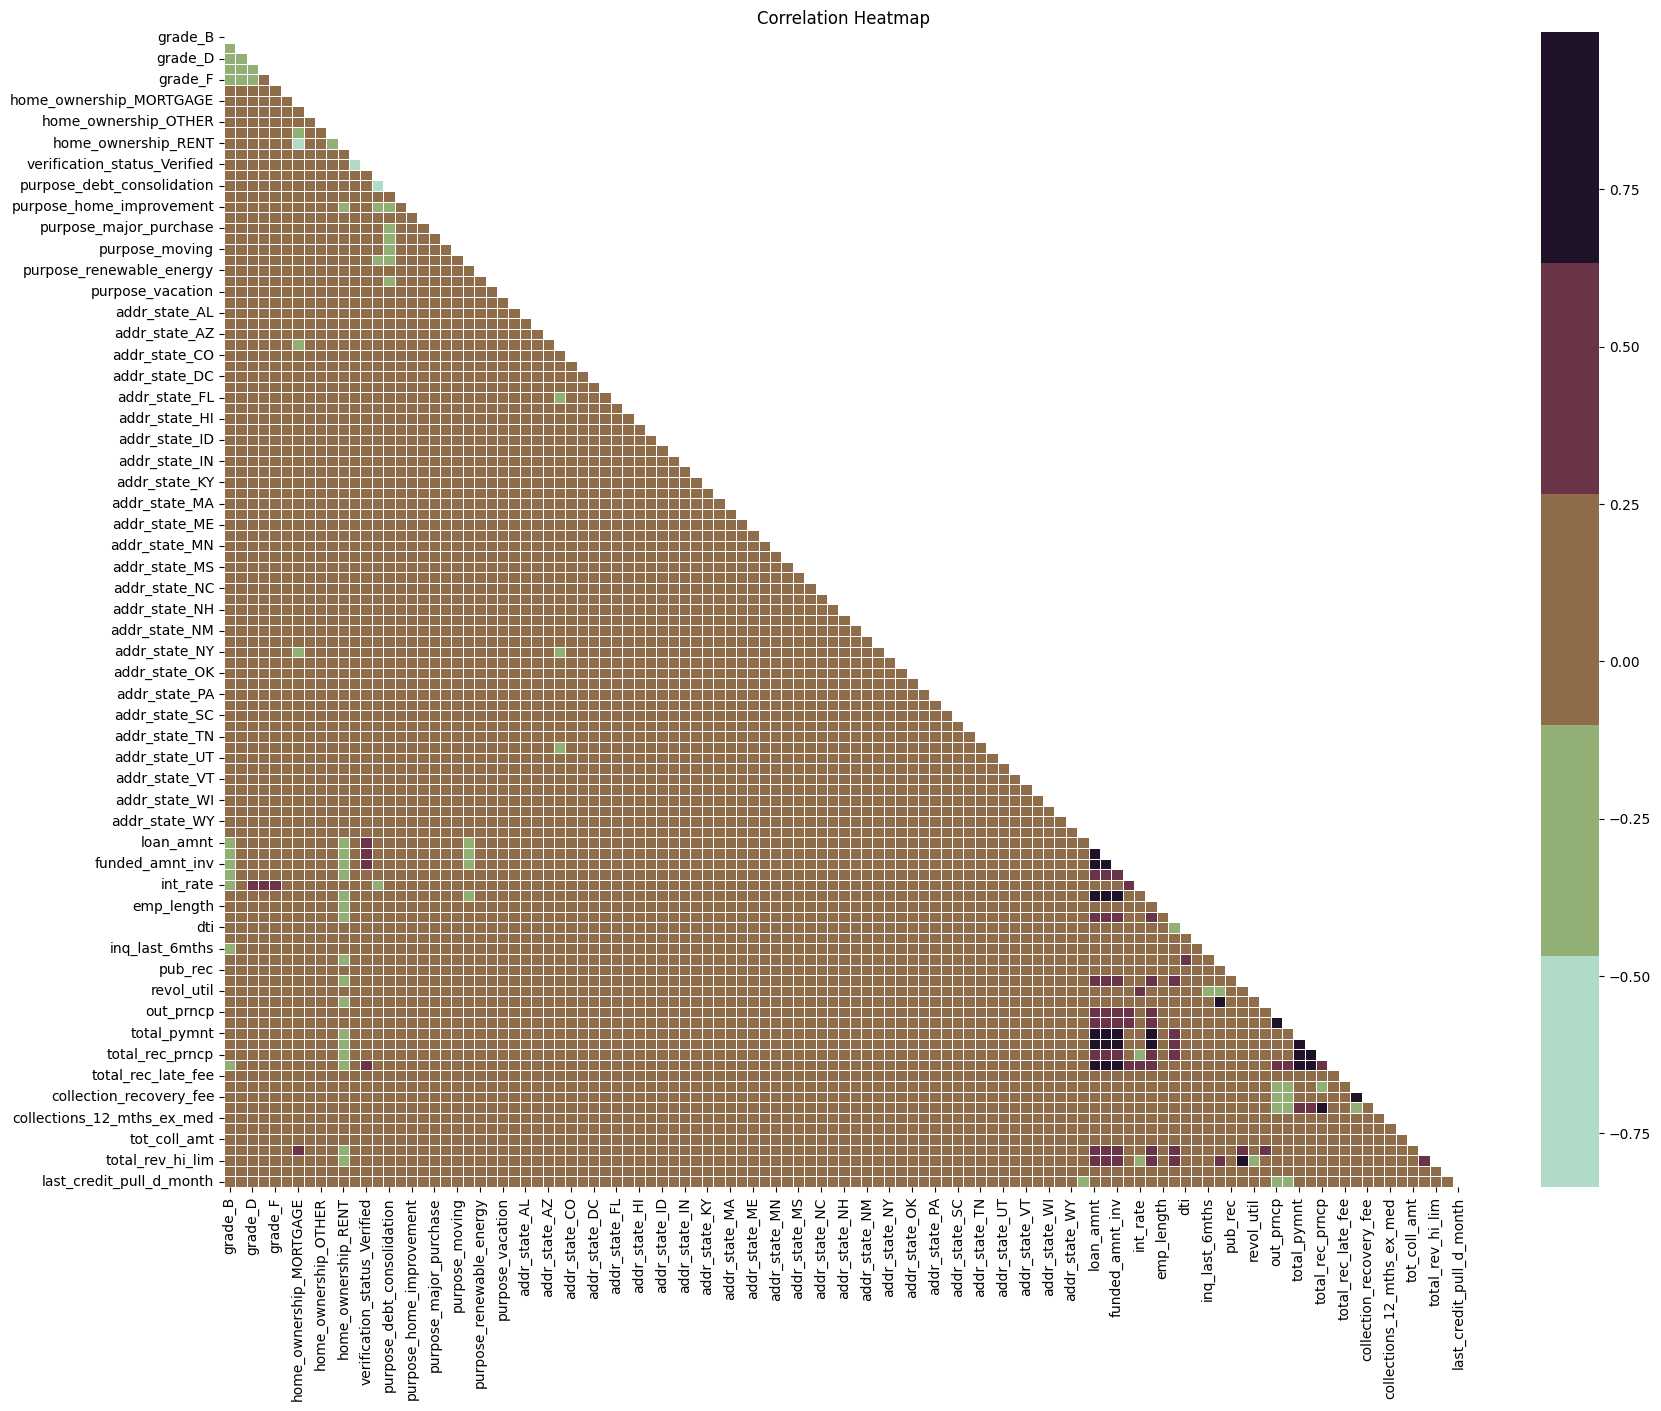

In [184]:
df_heatmap = X_train_oversampled
plt.figure(figsize=(20, 15))
ax = plt.gca()
corr_matrix = custom_heatmap(df_heatmap, ax)
plt.show()

In [185]:
print("Pairs of features with high correlation between them:")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}")
features_to_drop = set()
for pair in high_corr_pairs:
    features_to_drop.update(pair)
high_corr_features = list(features_to_drop)

Pairs of features with high correlation between them:
funded_amnt and loan_amnt
funded_amnt_inv and loan_amnt
funded_amnt_inv and funded_amnt
installment and loan_amnt
installment and funded_amnt
installment and funded_amnt_inv
out_prncp_inv and out_prncp
total_pymnt_inv and total_pymnt
total_rec_prncp and total_pymnt
total_rec_prncp and total_pymnt_inv


In [200]:
drop = ['out_prncp_inv', 'funded_amnt_inv', 'funded_amnt', 'total_rec_prncp', 'total_pymnt_inv']


In [201]:
X_train_oversampled = X_train_oversampled.drop(columns=drop)
X_test_ready = X_test_ready.drop(columns=drop)

# Modeling and Evaluation

In [202]:
# Define the models
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


def train_models(X_train, y_train, X_test, y_test, models):
    trained_models = []
    for model, model_name in models:
        print(f'Training {model_name}:')
        model.fit(X_train, y_train)
        print("Finished")
        trained_models.append((model_name, model))
    print("All models have Finished training.")
    return trained_models

def evaluate_models(trained_models, X_test, y_test):
    results = []
    for i, (model_name, _) in enumerate(trained_models):
        model = trained_models[i][1]
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        print(f'{model_name} F1 Score: {f1:.2f}')
        results.append((model_name, f1))
    return results

In [203]:
# Define the models
models = [
    (LGBMClassifier(verbosity=-1), 'LightGBM'),
    (XGBClassifier(), 'XGBoost'),
]

In [204]:
print("Training models without tuning:")
var1_trained_models_no_tuning = train_models(X_train_oversampled, y_train_oversampled, X_test_ready, y_test, models)

Training models without tuning:
Training LightGBM:
Finished
Training XGBoost:
Finished
All models have Finished training.


In [206]:
from sklearn.metrics import f1_score
print("Evaluating models without tuning:")
var1_results_no_tuning = evaluate_models(var1_trained_models_no_tuning, X_test_ready, y_test)

Evaluating models without tuning:
LightGBM F1 Score: 0.90
XGBoost F1 Score: 0.90


In [217]:
var1_results_no_tuning[0]

('LightGBM', 0.8993982793773931)

In [216]:
var1_results_no_tuning[1]

('XGBoost', 0.9040396455924312)